# Tutorial 4: calculate the dipole moment of Ag55

This tutorial show how to use the `comp_dipole_moment` module of PyNAO including:

* calculation of the dipole moment for delta-kick excitation
* calculation of dipole strength function
* calculation of dipole moment for Gaussian pulse excitation

First, run or load a simulation in frequency domain. The frequencies are selected based on time instances for which the dipole moment is to be calculated.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

from pynao import tddft_iter
from pynao.m_comp_spatial_distributions import spatial_distribution
import pynao.m_siesta_units as msu
import pynao.m_comp_dipole_moment as dipole
import pynao.m_fft as ft

Ha = msu['ha2ev']
fs = msu['fs2autime']

eps = 0.05/Ha # iterative broadening
t1 = np.linspace(0,10,100) # in fs
run_sim = False

if run_sim:
    # run tddft calculation
    td = tddft_iter(label="siesta", iter_broadening=eps, xc_code='LDA,PZ')

    w2 = dipole.comp_omegas(t1*fs)

    omegas = w2 + 1j*td.eps
    dn0, p_mat = td.comp_dens_along_Eext(omegas, Eext=np.array([1.0, 0.0, 0.0]),inter=True)
    eps = td.eps
    sio.savemat('result.mat',{'omegas':omegas,'p_mat':p_mat,'eps':eps})
else:
    w = sio.loadmat('result.mat')
    omegas, polarizability = (w['omegas'][0],w['p_mat'][0,0,:])
polarizability = -polarizability
omegas = omegas.real

## Dipole moment calculation:

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


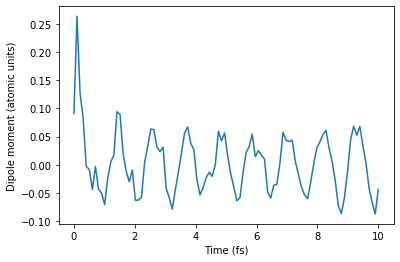

In [4]:
dm_kick = dipole.comp_dipole_moment_kick(omegas, polarizability, eps=eps, kick_magnitude=1e-3)

plt.plot(t1, dm_kick)
plt.xlabel('Time (fs)')
plt.ylabel('Dipole moment (atomic units)')
plt.show()

## Computation of dipole strength function:

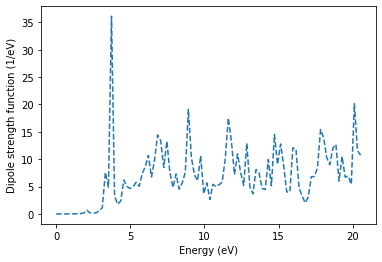

In [5]:
import scipy.io as sio
plt.plot(omegas*Ha,dipole.comp_dipole_strength_function(omegas, polarizability)/Ha)
plt.xlabel('Energy (eV)')
plt.ylabel('Dipole strength function (1/eV)')
plt.show()

## Computation of dipole moment for a Gaussian pulse

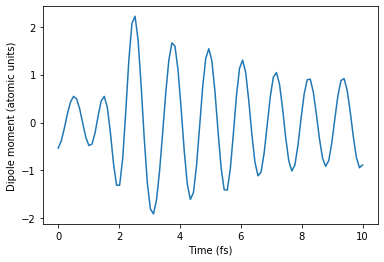

In [6]:
p = dipole.comp_dipole_moment_gauss(omegas, polarizability, amplitude = 1e-3, center_frequency = 3.65 / Ha,
                                    center_time = 2.303 * fs,
                                    duration = 0.8225 * fs)
plt.plot(t1,p)
plt.xlabel('Time (fs)')
plt.ylabel('Dipole moment (atomic units)')
plt.show()

In [9]:
amplitude = 1e-3
center_frequency = 3.65/Ha
center_time = 2.303*fs
duration = 0.8225*fs
gp = dipole.gaussian_pulse(t1*fs, amplitude, center_frequency, center_time, duration)

plt.plot(t1, gp)
plt.xlabel('Time (fs)')
plt.ylabel('Electric field (atomic units)')
plt.show()